In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, fbeta_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_hist_gradient_boosting
from pandas import read_csv
import IPython
from IPython.display import display

%matplotlib inline

In [3]:
df = read_csv('global_air_pollution_data.csv')
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
df.isna().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [7]:
df.dtypes

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [8]:
df['country_name'].value_counts()

country_name
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

In [9]:
df['aqi_category'].value_counts()

aqi_category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

<Axes: xlabel='aqi_category', ylabel='Count'>

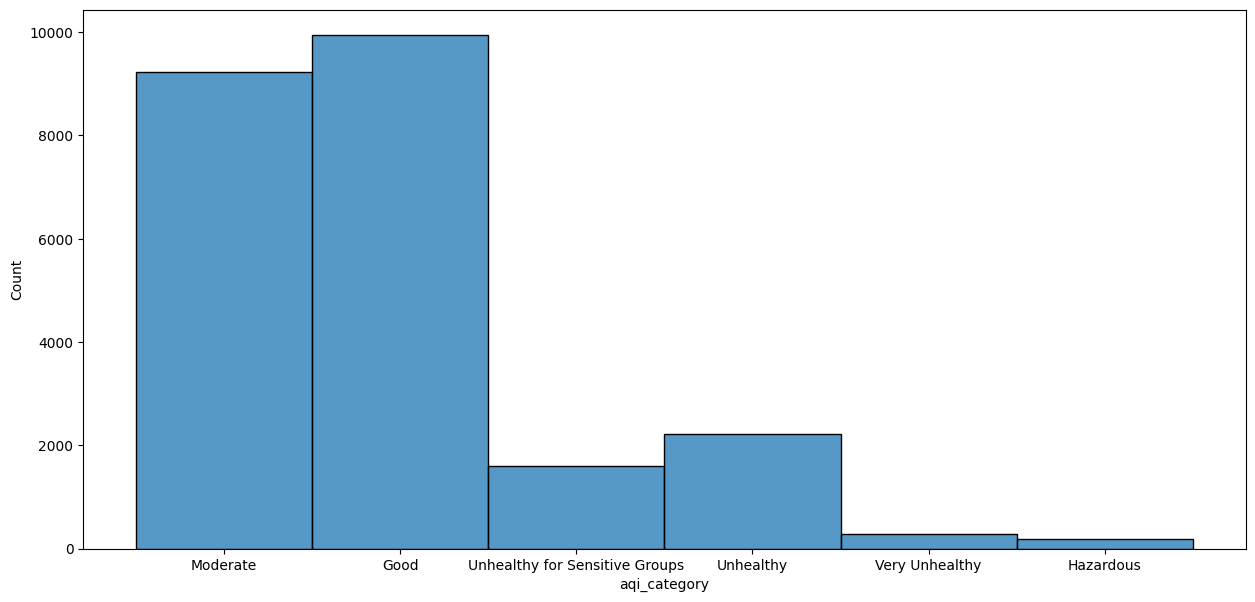

In [10]:
# Distribution of Air Quality categories across the dataset
plt.figure(figsize=(15,7))
sns.histplot(df['aqi_category'], bins=10)

<Axes: xlabel='co_aqi_category', ylabel='Count'>

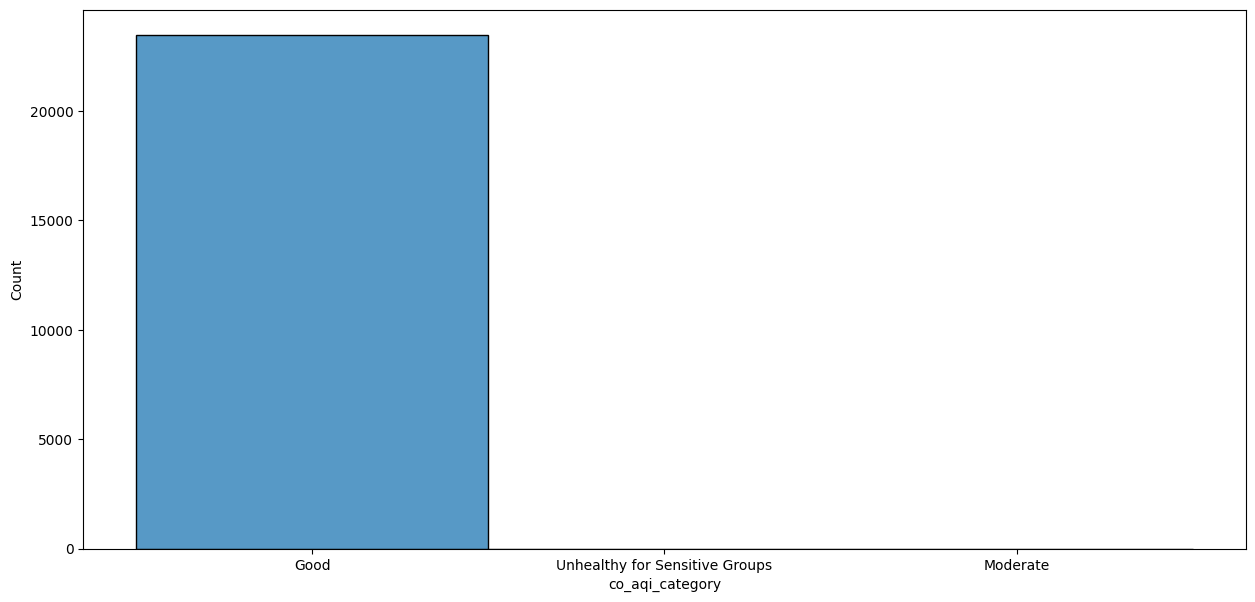

In [11]:
# distribution of CO2 Categories
plt.figure(figsize=(15,7))
sns.histplot(df['co_aqi_category'])

<Axes: xlabel='no2_aqi_category', ylabel='Count'>

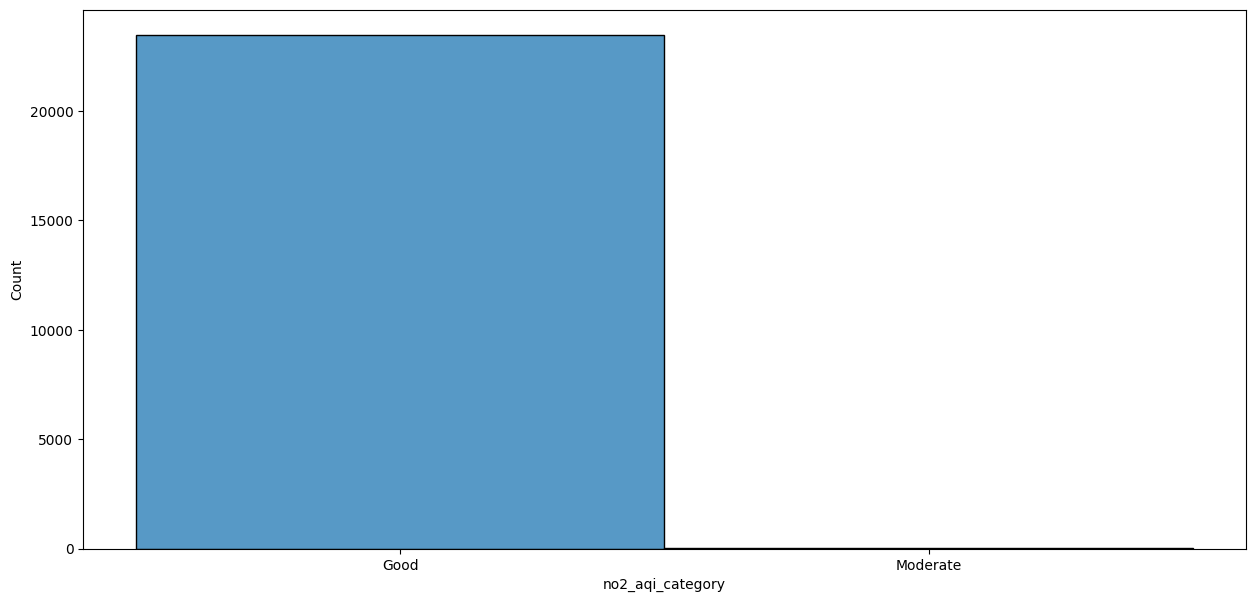

In [12]:
# distribution of Nitrogen Category
plt.figure(figsize=(15,7))
sns.histplot(df['no2_aqi_category'])

<Axes: xlabel='ozone_aqi_category', ylabel='Count'>

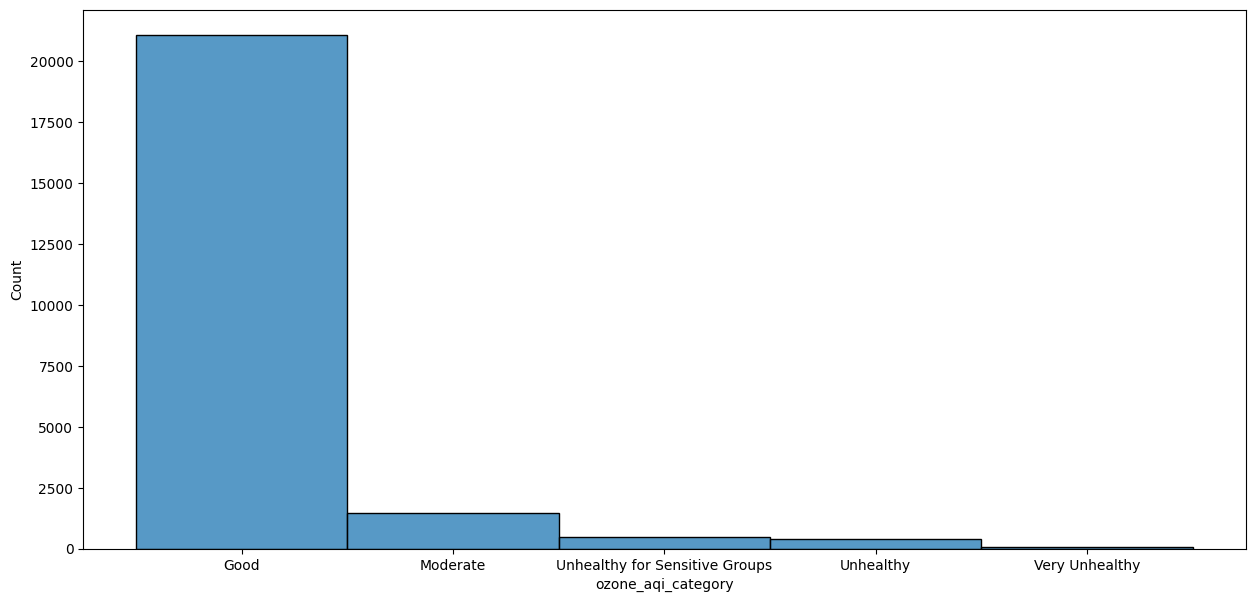

In [13]:
# distribution of Ozone Categories
plt.figure(figsize=(15,7))
sns.histplot(df['ozone_aqi_category'])

<Axes: xlabel='pm2.5_aqi_category', ylabel='Count'>

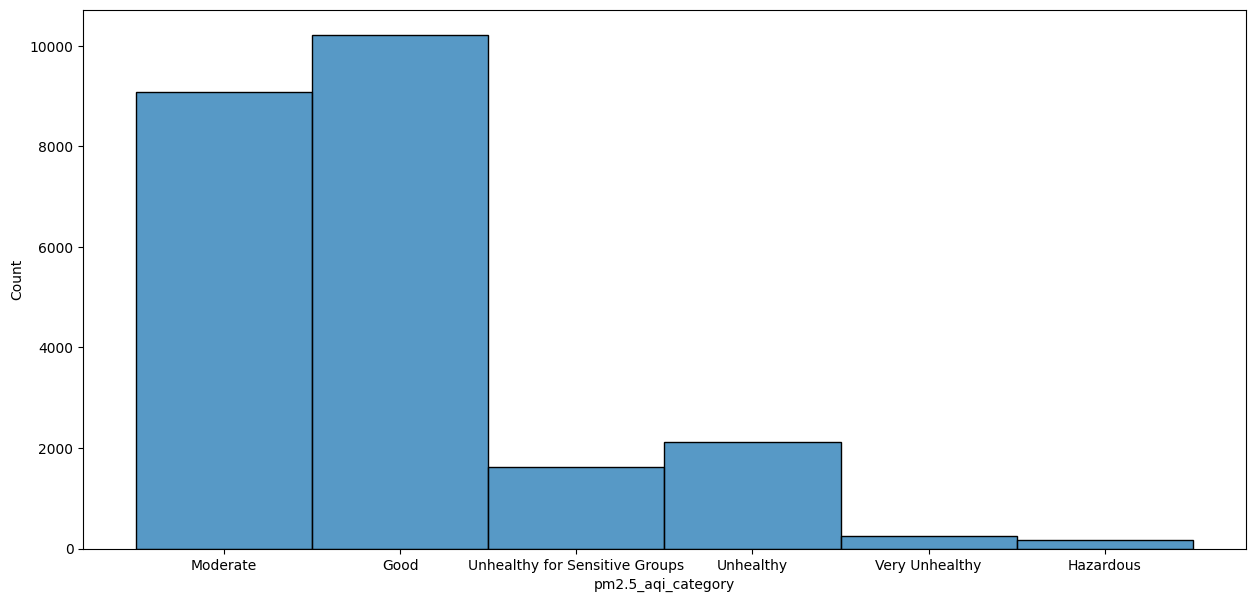

In [14]:
# distribution of PM 2.5 Categories
plt.figure(figsize=(15,7))
sns.histplot(df['pm2.5_aqi_category'])

# Removing Missing Values

In [15]:
df.isna().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64

## DEALING WITH CATEGORICAL COLUMNS AND CONVERT THEM TO NUMBERS

In [17]:
col = [column for column in df.columns if df[column].dtypes not in ['float64', 'int64']]
col

['country_name',
 'city_name',
 'aqi_category',
 'co_aqi_category',
 'ozone_aqi_category',
 'no2_aqi_category',
 'pm2.5_aqi_category']

In [18]:
df.country_name.value_counts()

country_name
United States of America    2872
India                       2488
Brazil                      1562
Germany                     1345
Russian Federation          1241
                            ... 
Vanuatu                        1
Solomon Islands                1
Republic of Korea              1
Saint Lucia                    1
Monaco                         1
Name: count, Length: 175, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()


In [20]:
num = [num for num in df.columns if df[num].dtypes == 'int']
num

['aqi_value',
 'co_aqi_value\t',
 'ozone_aqi_value',
 'no2_aqi_value',
 'pm2.5_aqi_value']

In [21]:
cat = df.select_dtypes(include='object')
cat.dtypes

country_name          object
city_name             object
aqi_category          object
co_aqi_category       object
ozone_aqi_category    object
no2_aqi_category      object
pm2.5_aqi_category    object
dtype: object

In [22]:
# Apply get_dummies to each categorical column
dummy = pd.get_dummies(df[col], drop_first=True)

In [23]:
df_enc = pd.concat([df[num], dummy], axis=1)
df_enc.head()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,country_name_Argentina,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,51,1,36,0,51,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,41,1,5,1,41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,66,1,39,2,66,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,1,34,0,20,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22,0,22,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [25]:
#df = pd.get_dummies(df, columns=col)
df_enc.head()

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,country_name_Argentina,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,51,1,36,0,51,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,41,1,5,1,41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,66,1,39,2,66,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,1,34,0,20,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22,0,22,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_enc.dtypes

aqi_value                                            int64
co_aqi_value\t                                       int64
ozone_aqi_value                                      int64
no2_aqi_value                                        int64
pm2.5_aqi_value                                      int64
                                                     ...  
pm2.5_aqi_category_Hazardous                          bool
pm2.5_aqi_category_Moderate                           bool
pm2.5_aqi_category_Unhealthy                          bool
pm2.5_aqi_category_Unhealthy for Sensitive Groups     bool
pm2.5_aqi_category_Very Unhealthy                     bool
Length: 23230, dtype: object

In [27]:
df_enc

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,country_name_Argentina,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,51,1,36,0,51,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,41,1,5,1,41,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,66,1,39,2,66,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,1,34,0,20,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22,0,22,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,184,3,154,2,184,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
23459,50,1,20,5,50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23460,50,1,22,1,50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23461,71,1,44,2,71,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [28]:
df.aqi_category.value_counts()

aqi_category
Good                              9688
Moderate                          9087
Unhealthy                         2215
Unhealthy for Sensitive Groups    1568
Very Unhealthy                     286
Hazardous                          191
Name: count, dtype: int64

In [29]:
df.dtypes

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [30]:
X = df_enc.drop(['aqi_value'], axis=1)

X.head()

,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,country_name_Argentina,country_name_Armenia,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,1,36,0,51,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,5,1,41,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,39,2,66,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,34,0,20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,22,0,6,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
y = df['aqi_value']
y.head()

0    51
1    41
2    66
3    34
4    22
Name: aqi_value, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
X.columns

Index(['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value',
       'country_name_Albania', 'country_name_Algeria', 'country_name_Andorra',
       'country_name_Angola', 'country_name_Argentina', 'country_name_Armenia',
       ...
       'ozone_aqi_category_Moderate', 'ozone_aqi_category_Unhealthy',
       'ozone_aqi_category_Unhealthy for Sensitive Groups',
       'ozone_aqi_category_Very Unhealthy', 'no2_aqi_category_Moderate',
       'pm2.5_aqi_category_Hazardous', 'pm2.5_aqi_category_Moderate',
       'pm2.5_aqi_category_Unhealthy',
       'pm2.5_aqi_category_Unhealthy for Sensitive Groups',
       'pm2.5_aqi_category_Very Unhealthy'],
      dtype='object', length=23229)

In [34]:
columns=X.columns

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
X = scaler.fit_transform(X)

In [37]:
display(X)

array([[0.0075188 , 0.15319149, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.0212766 , 0.01098901, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.16595745, 0.02197802, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0075188 , 0.09361702, 0.01098901, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.18723404, 0.02197802, ..., 0.        , 0.        ,
        0.        ],
       [0.0075188 , 0.16170213, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
X=pd.DataFrame(data = X,columns = columns)
X.head()

,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,country_name_Albania,country_name_Algeria,country_name_Andorra,country_name_Angola,country_name_Argentina,country_name_Armenia,...,ozone_aqi_category_Moderate,ozone_aqi_category_Unhealthy,ozone_aqi_category_Unhealthy for Sensitive Groups,ozone_aqi_category_Very Unhealthy,no2_aqi_category_Moderate,pm2.5_aqi_category_Hazardous,pm2.5_aqi_category_Moderate,pm2.5_aqi_category_Unhealthy,pm2.5_aqi_category_Unhealthy for Sensitive Groups,pm2.5_aqi_category_Very Unhealthy
0,0.007519,0.153191,0.000000,0.102,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.007519,0.021277,0.010989,0.082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007519,0.165957,0.021978,0.132,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.007519,0.144681,0.000000,0.040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.093617,0.000000,0.012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=123)

Feature Transformation
Feature transformation is a mathematical transformation in which we apply a mathematical formula to data and transform 
the values which are useful for our further analysis.

# Hybrid Model Development

## Most important columns and features
* pm 2.5
* ozone value
* co value
* no2 value

In [41]:
from sklearn.ensemble import StackingRegressor

In [42]:
# create models that will build on accuracy OR base model
bases = [
    ('XGBOOST', XGBRegressor(n_estimators=110, random_state=42)),
    ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
    ('CatBoostRegressor', CatBoostRegressor(n_estimators=200, random_state=42)),
    ('LIGHT GRADIENT BOOSTING', LGBMRegressor()),
    ('GRADIENT BOOSTING', GradientBoostingRegressor(n_estimators=100, criterion='squared_error',))
]

In [43]:
# create my meta model from the best performing model
final_model = AdaBoostRegressor(n_estimators=100)

In [46]:
Cat_Hybrid = StackingRegressor(estimators=bases, final_estimator=final_model, cv=10).fit(X_train, Y_train)

Learning rate set to 0.235084
0:	learn: 44.6986865	total: 158ms	remaining: 31.4s
1:	learn: 35.4049326	total: 215ms	remaining: 21.3s
2:	learn: 27.8047125	total: 272ms	remaining: 17.9s
3:	learn: 22.2848991	total: 351ms	remaining: 17.2s
4:	learn: 18.1126350	total: 439ms	remaining: 17.1s
5:	learn: 14.8370184	total: 512ms	remaining: 16.6s
6:	learn: 12.2620136	total: 640ms	remaining: 17.7s
7:	learn: 10.1966310	total: 722ms	remaining: 17.3s
8:	learn: 8.7441993	total: 780ms	remaining: 16.6s
9:	learn: 7.6168683	total: 853ms	remaining: 16.2s
10:	learn: 6.7204630	total: 1.01s	remaining: 17.3s
11:	learn: 6.0754327	total: 1.07s	remaining: 16.7s
12:	learn: 5.5254456	total: 1.13s	remaining: 16.2s
13:	learn: 5.1734538	total: 1.2s	remaining: 16s
14:	learn: 4.8287638	total: 1.25s	remaining: 15.4s
15:	learn: 4.5693727	total: 1.32s	remaining: 15.2s
16:	learn: 4.3985986	total: 1.45s	remaining: 15.6s
17:	learn: 4.1994633	total: 1.63s	remaining: 16.5s
18:	learn: 4.0744537	total: 1.8s	remaining: 17.2s
19:	lea

In [47]:
score = Cat_Hybrid.score(X_train, Y_train)
print(f"Training Accuracy: {score:.2f}%")

Training Accuracy: 0.99%


In [48]:
predictions = Cat_Hybrid.predict(X_test)

In [51]:
score_t = Cat_Hybrid.score(X_test, Y_test)


In [52]:
print(f"Testing Accuracy: {score_t*100:.1f}%")

Testing Accuracy: 98.4%


In [53]:
mae  = mean_squared_error(Y_test, predictions)

In [56]:
print(f"Mean Squared Error: {mae:.2f}")

Mean Squared Error: 50.91


In [57]:
print(f"mean_absolute_error: {mean_absolute_error(Y_test, predictions):.2f}")

mean_absolute_error: 5.04
